In [1]:
import pandas  as pd
import numpy as np

In [2]:
import nltk, re
nltk.download('stopwords') # load english stopwords
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")
warnings.warn("deprecated", DeprecationWarning)
warnings.simplefilter("ignore")

[nltk_data] Downloading package stopwords to C:\Users\PRATIK
[nltk_data]     PANIGRAHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data=pd.read_csv(r'C:\Users\PRATIK PANIGRAHI\Desktop\NLP CLASSES\assignment 8\NLP Projects to do\Project_2\messages.csv')
data.head(5)

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [4]:
data=data.replace(np.nan,"",regex=True)
data.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [83]:
data.columns

Index(['subject', 'message', 'label'], dtype='object')

In [5]:
data.isnull().sum()

subject    0
message    0
label      0
dtype: int64

In [85]:
data.shape

(2893, 3)

In [86]:
data.dtypes

subject    object
message    object
label       int64
dtype: object

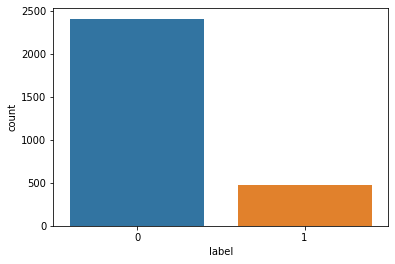

In [7]:
import seaborn as sns
sns.countplot(x=data['label'])

In [8]:
#data['information']=data['subject'].str.cat(data['message'],sep=' ')
data['information']= data["subject"].astype(str) +" "+ data["message"]
data.head()

,subject,message,label,information
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research center conten...
1,,"lang classification grimes , joseph e . and ba...",0,"lang classification grimes , joseph e . and b..."
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...
3,risk,a colleague and i are researching the differin...,0,risk a colleague and i are researching the dif...
4,request book information,earlier this morning i was on the phone with a...,0,request book information earlier this morning ...


In [9]:
data1=data.drop(['subject','message'],axis=1)

In [11]:
data1

,label,information
0,0,job posting - apple-iss research center conten...
1,0,"lang classification grimes , joseph e . and b..."
2,0,query : letter frequencies for text identifica...
3,0,risk a colleague and i are researching the dif...
4,0,request book information earlier this morning ...
5,0,call for abstracts : optimality in syntactic t...
6,0,m . a . in scandinavian linguistics m . a . in...
7,0,call for papers : linguistics session of the m...
8,0,foreign language in commercials content - leng...
9,0,fulbright announcement : please post / dissemi...


In [12]:
data1['label'].value_counts()

0    2412
1     481
Name: label, dtype: int64

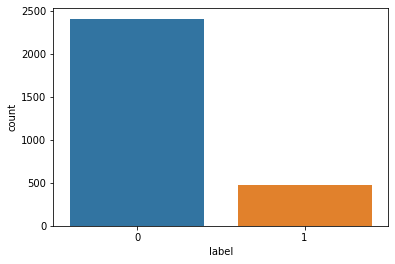

In [13]:
import seaborn as sns
sns.countplot(x=data1['label'])

In [14]:
#New column for Length of message
data1['length'] = data1.information.str.len()
data1.head(100)

,label,information,length
0,0,job posting - apple-iss research center conten...,2896
1,0,"lang classification grimes , joseph e . and b...",1801
2,0,query : letter frequencies for text identifica...,1486
3,0,risk a colleague and i are researching the dif...,329
4,0,request book information earlier this morning ...,1071
5,0,call for abstracts : optimality in syntactic t...,4544
6,0,m . a . in scandinavian linguistics m . a . in...,2237
7,0,call for papers : linguistics session of the m...,855
8,0,foreign language in commercials content - leng...,1262
9,0,fulbright announcement : please post / dissemi...,1538


In [200]:
data1.shape

(2893, 3)

In [91]:
def lower_case(series):
    return series.lower()

In [92]:
data1['information']=data1['information'].apply(lower_case)

In [93]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;-_*0-9+]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
def text_prepare(series):
    series=re.sub(r'^.+@[^\.].*\.[a-z]{2,}$','email',series)
    series=re.sub(r'^http\://[a-z0-9\-\.]+\.[a-z]{2,3}(/\S*)?$','webaddress',series)
    series=re.sub(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','number',series)
    series=re.sub(r'\d+(\.\d+)?', 'numbr',series)
    series=re.sub(REPLACE_BY_SPACE_RE," ",series)
    series = re.sub(BAD_SYMBOLS_RE," ",series)
    series = re.sub(r'\s+'," ",series)
    return series
    

In [95]:
tests = ["SQL server - any equivalent of Excel's CHOOSE function_?164441545, - https://medium.com/@datamonsters",
        "How to free  c++ memory vector<int> * arr?"]
for test in tests: print(text_prepare(test))

 server any equivalent of xcel s function numbr https medium com datamonsters
 ow to free c memory vector int arr 


In [19]:
data1['information']=data1['information'].map(text_prepare)
data1

,label,information,length
0,0,job posting apple iss research center content ...,2896
1,0,lang classification grimes joseph e and barba...,1801
2,0,query letter frequencies for text identificati...,1486
3,0,risk a colleague and i are researching the dif...,329
4,0,request book information earlier this morning ...,1071
5,0,call for abstracts optimality in syntactic the...,4544
6,0,m a in scandinavian linguistics m a in scandin...,2237
7,0,call for papers linguistics session of the m m...,855
8,0,foreign language in commercials content length...,1262
9,0,fulbright announcement please post disseminate...,1538


In [20]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

data1['information'] = data1['information'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [50]:
# New column (clean_length) after puncuations,stopwords removal
data1['clean_length'] = data1.information.str.len()
data1

,label,information,length,clean_length
0,0,job posting apple iss research center content ...,2896,2077
1,0,lang classification grimes joseph e barbara f ...,1801,1430
2,0,query letter frequencies text identification p...,1486,1109
3,0,risk colleague researching differing degrees r...,329,215
4,0,request book information earlier morning phone...,1071,654
5,0,call abstracts optimality syntactic theory con...,4544,3399
6,0,scandinavian linguistics scandinavian linguist...,2237,1604
7,0,call papers linguistics session mla call paper...,855,693
8,0,foreign language commercials content length nu...,1262,829
9,0,fulbright announcement please post disseminate...,1538,1273


In [22]:
print('original length',data1.length.sum())
print('clean length',data1.clean_length.sum())

original length 9439299
clean length 6643971


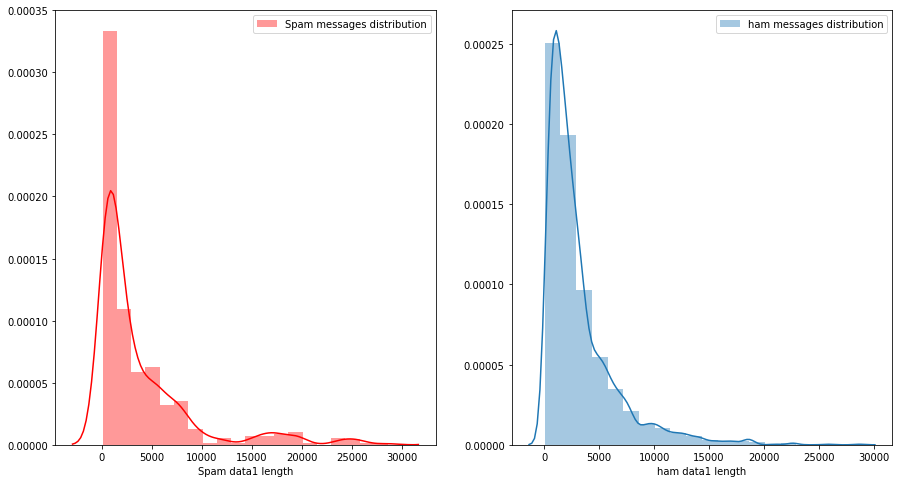

In [25]:
# Message distribution BEFORE cleaning
import matplotlib.pyplot as plt
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(data1[data1['label']==1]['length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam data1 length')
ax[0].legend()

sns.distplot(data1[data1['label']==0]['length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham data1 length')
ax[1].legend()

plt.show()

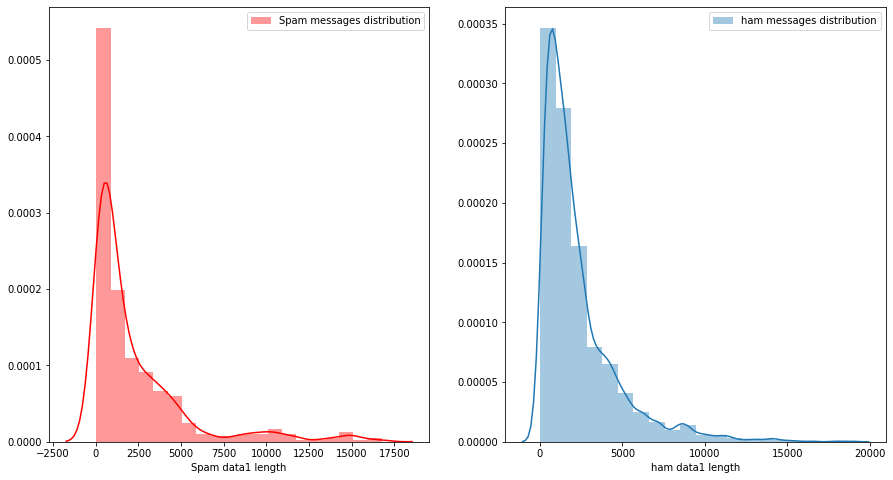

In [26]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(data1[data1['label']==1]['clean_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam data1 length')
ax[0].legend()

sns.distplot(data1[data1['label']==0]['clean_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham data1 length')
ax[1].legend()

plt.show()

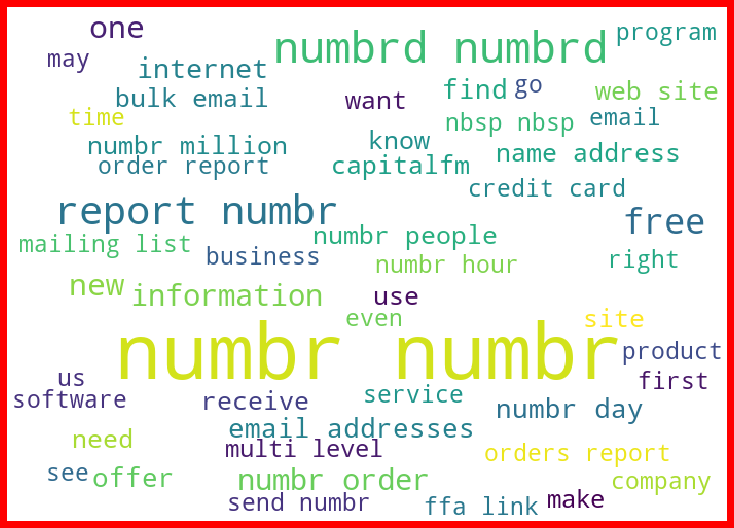

In [32]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = data1['information'][data1['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

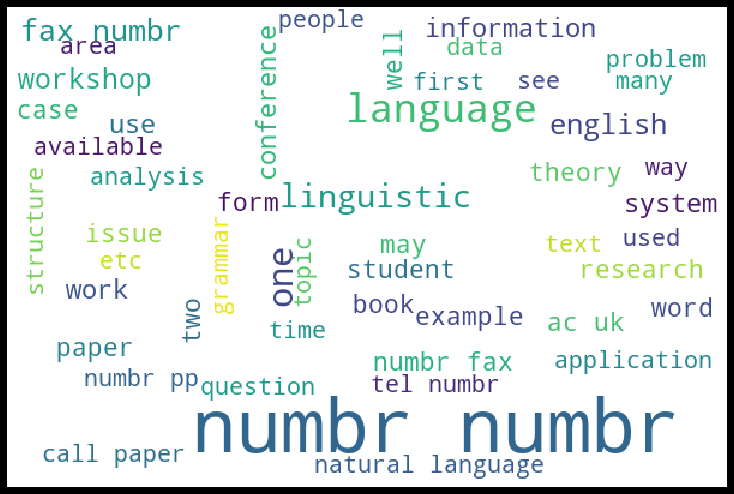

In [33]:
#Getting sense of loud words in ham 

hams = data1['information'][data1['label']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [58]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(data1['information'])

X = features
y = data1['label']

In [59]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(X,y,train_size=0.7)

In [78]:
#performing over sampling to reduce the over fitting
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.70)
X_train_ns,Y_train_ns=os.fit_sample(X_train,Y_train)
print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(Y_train_ns)))

The number of classes before fit Counter({0: 1694, 1: 331})
The number of classes after fit Counter({0: 1694, 1: 1185})


In [79]:
naive.fit(X_train_ns,Y_train_ns)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.9953917050691244


In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       718
           1       0.98      0.99      0.99       150

    accuracy                           1.00       868
   macro avg       0.99      0.99      0.99       868
weighted avg       1.00      1.00      1.00       868



In [81]:
conf_mat

array([[715,   3],
       [  1, 149]], dtype=int64)

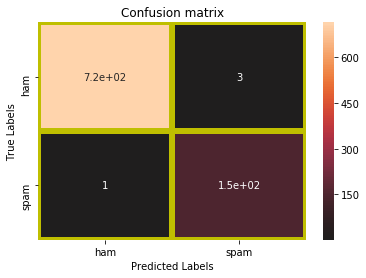

In [102]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='y',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()

In [83]:
#Log loss metrics
log=log_loss(y_test,y_pred)

In [84]:
print(log)

0.1591676317649011


After building the model i got 99 percent accuracy and log_loss metrice value 0.15.

In [ ]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(naive) 
  
# Load the pickled model 
naive_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
naive_from_pickle.predict(X_test) 

In [97]:
#saving the model as pickl
from sklearn.externals import joblib
joblib.dump(naive,"spam_classification_Pratik.pkl")

['spam_classification_Pratik.pkl']